In [1]:
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns

import demoji
import emoji
import nltk
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

In [3]:
data = pd.read_csv(r'data\data_clean.csv',index_col=False)
analys = data.copy()

# Minimun Requirment

##  What is S and/or topics in the reviews?

In [3]:
analys.head(5)

,userName,content,score,thumbsUpCount,at,tokenized_sents,token_stemming,stem,filtered_stem,content_len,word_count,time,sentiment,polarity,lang,english
0,Ahmad Indra,lemot buka eazy saham aja loading mulu mau searching saham nggak bisa,1,0,2023-10-17 21:24:12,"['lemot', 'buka', 'eazy', 'saham', 'aja', 'loading', 'mulu', 'mau', 'searching', 'saham', 'nggak', 'bisa']","['lot', 'buka', 'eazy', 'saham', 'aja', 'loading', 'mulu', 'mau', 'searching', 'saham', 'nggak', 'bisa']",lot buka eazy saham aja loading mulu mau searching saham nggak bisa,"['buka', 'eazy', 'loading', 'mulu', 'searching', 'nggak']",71,12,PM,6,Positive,id,it s slow to open eazy shares it just loads but i want to search for shares i can t
1,Zydan Abli,appnya kenapa lemot ya,3,0,2023-10-17 11:15:40,"['appnya', 'kenapa', 'lemot', 'ya']","['appnya', 'kenapa', 'lot', 'ya']",appnya kenapa lot ya,['appnya'],22,4,AM,0,Neutral,id,why is the app slow
2,Rezza Tri Umami,ipot ipottt kog lemoott gak berubah ubah dari dulu sekarang update bukanya makin stabil makin cepet malah semakin lemot huufftt,1,0,2023-10-17 10:51:19,"['ipot', 'ipottt', 'kog', 'lemoott', 'gak', 'berubah', 'ubah', 'dari', 'dulu', 'sekarang', 'update', 'bukanya', 'makin', 'stabil', 'makin', 'cepet', 'malah', 'semakin', 'lemot', 'huufftt']","['ipot', 'ipottt', 'kog', 'lemoott', 'gak', 'ubah', 'ubah', 'dari', 'dulu', 'sekarang', 'update', 'buka', 'makin', 'stabil', 'makin', 'cepet', 'malah', 'makin', 'lot', 'huufftt']",ipot ipottt kog lemoott gak ubah ubah dari dulu sekarang update buka makin stabil makin cepet malah makin lot huufftt,"['ipottt', 'kog', 'lemoott', 'gak', 'ubah', 'ubah', 'buka', 'stabil', 'cepet', 'huufftt']",130,20,AM,8,Positive,id,ipot ipot how come it hasn t changed for a long time it s changed from before now the update is not getting more stable it s getting faster it s actually getting slower hufftt
3,Wawan Gunawan,assalamu alaikum warahmatullahi wabarokatuh berkenan,5,0,2023-10-17 00:41:20,"['assalamu', 'alaikum', 'warahmatullahi', 'wabarokatuh', 'berkenan']","['assalamu', 'alaikum', 'warahmatullahi', 'wabarokatuh', 'kenan']",assalamu alaikum warahmatullahi wabarokatuh kenan,"['assalamu', 'alaikum', 'warahmatullahi', 'wabarokatuh', 'kenan']",52,5,AM,4,Positive,id,assalamu alaikum warahmatullahi wabarokatuh pleased
4,Rizky Bahari,sorry rubah bintang dari 5 jadi 2 penarikan biasanya cepat jadi lambat tarik dari 11 oktober sampai tanggal 16 oktober belum masuk,2,0,2023-10-16 12:36:10,"['sorry', 'rubah', 'bintang', 'dari', '5', 'jadi', '2', 'penarikan', 'biasanya', 'cepat', 'jadi', 'lambat', 'tarik', 'dari', '11', 'oktober', 'sampai', 'tanggal', '16', 'oktober', 'belum', 'masuk']","['sorry', 'rubah', 'bintang', 'dari', '5', 'jadi', '2', 'tari', 'biasa', 'cepat', 'jadi', 'lambat', 'tarik', 'dari', '11', 'oktober', 'sampai', 'tanggal', '16', 'oktober', 'belum', 'masuk']",sorry rubah bintang dari 5 jadi 2 tari biasa cepat jadi lambat tarik dari 11 oktober sampai tanggal 16 oktober belum masuk,"['sorry', 'rubah', 'bintang', '5', '2', 'tari', 'cepat', 'lambat', 'tarik', '11', 'oktober', 'tanggal', '16', 'oktober', 'masuk']",131,22,PM,-4,Negative,id,sorry changed the star from 5 to 2 withdrawals usually fast so slow withdrawals from october 11th to october 16th not yet received


In [4]:
new = " ".join(x for x in data['filtered_stem'])

In [5]:
listsw = nltk.corpus.stopwords.words('indonesian')
listsw.extend(['yg','dan','ke','di','nya','ya','itu','lagi','ini','aja','ipot','aplikasi','update','saham','lot'])
remove = []

for x in new:
    if x not in listsw:
        remove.append(x)

In [6]:
new = new.translate(str.maketrans('','',string.punctuation))

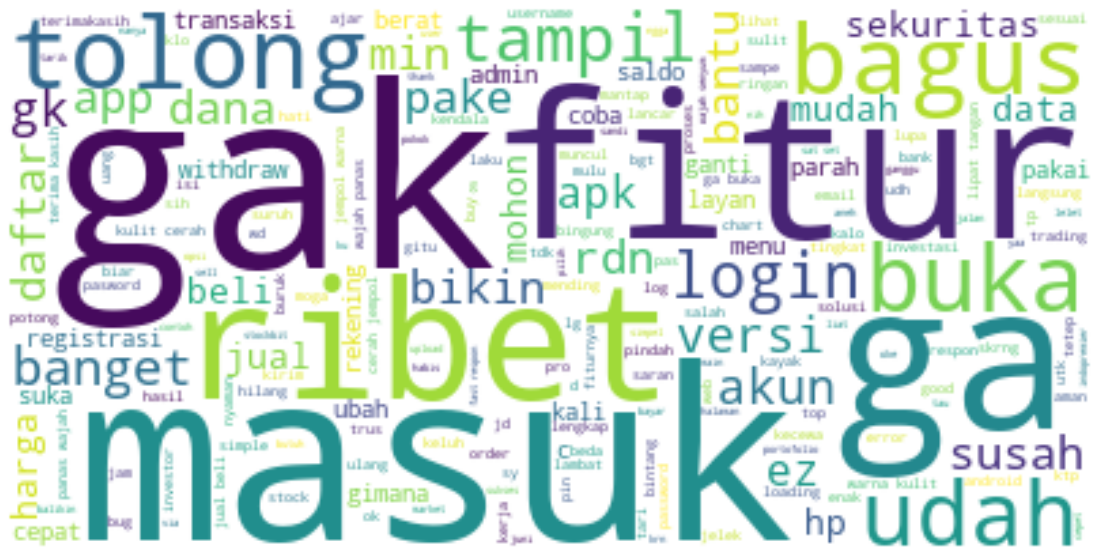

In [7]:
wc = WordCloud(background_color='white').generate(new)
plt.figure(figsize=(20,10))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
def goblok(x,y):

    x[y]=x[y].str.replace(r'[^\w\s]+',' ', regex=True)
    x[y]=x.apply(lambda c:nltk.word_tokenize(c[y]),axis=1)


In [9]:
goblok(data,'filtered_stem')

In [10]:
all_words = [word for word_list in data['filtered_stem'] for word in word_list]

# Create the frequency distribution
fdist = FreqDist(all_words)

# Get the most common 100 words
mc = fdist.most_common(25)

In [11]:
mc

[('gak', 77),
 ('masuk', 70),
 ('ga', 65),
 ('buka', 60),
 ('fitur', 55),
 ('ribet', 55),
 ('tolong', 53),
 ('udah', 53),
 ('bagus', 52),
 ('banget', 48),
 ('tampil', 47),
 ('akun', 43),
 ('login', 41),
 ('susah', 40),
 ('wajah', 39),
 ('gk', 38),
 ('beli', 37),
 ('jual', 36),
 ('data', 36),
 ('versi', 36),
 ('mudah', 33),
 ('sekuritas', 32),
 ('daftar', 32),
 ('jempol', 32),
 ('rdn', 31)]

In [12]:
a,b = zip(*mc)

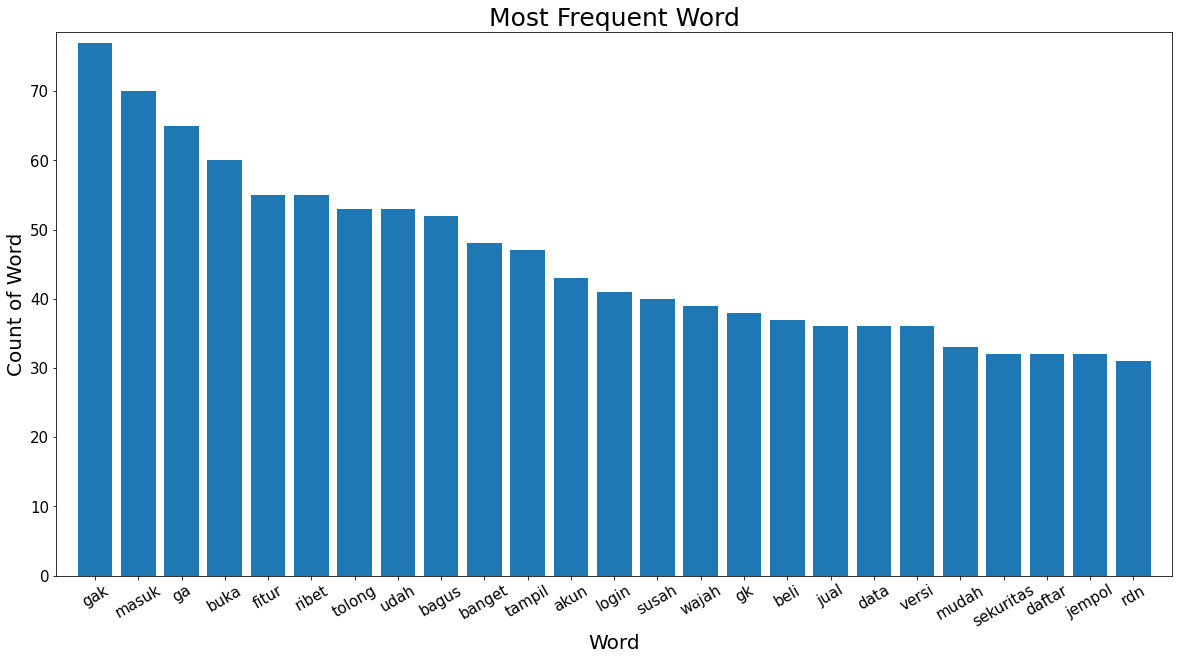

In [13]:
plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.bar(a,b)
plt.title('Most Frequent Word',fontsize = 25)
plt.xticks(rotation=30,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Word',fontsize=20)
plt.ylabel('Count of Word',fontsize=20);
plt.show()

## How would you dividing the reviews into two or more distinct groups along with corresponding descriptions?

Dived the reviews with the scores from sentimen.

if sentiment >0 = Positive

if sentiment =0 = neutral

if sentiment <0 = negative

In [14]:
analys['polarity'].value_counts()

Positive    435
Negative    151
Neutral     114
Name: polarity, dtype: int64

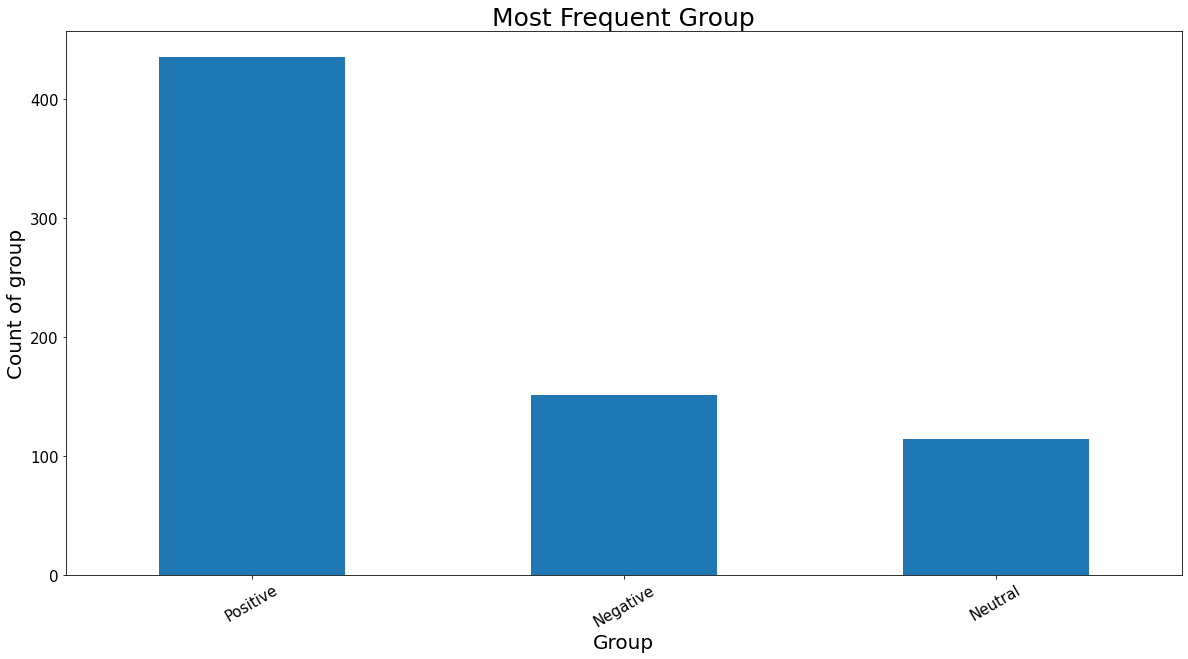

In [15]:
plt.figure(figsize=(20,10))
analys['polarity'].value_counts().plot(kind='bar')
plt.title('Most Frequent Group',fontsize = 25)
plt.xticks(rotation=30,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Group',fontsize=20)
plt.ylabel('Count of group',fontsize=20);
plt.show();

## Is there a correlation between the reviews and the given ratings?

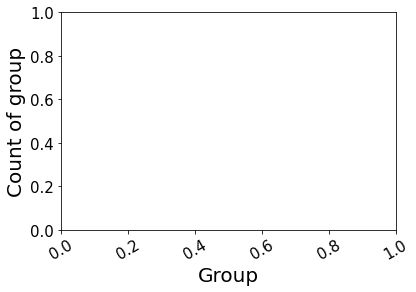

In [16]:
plt.xticks(rotation=30,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Group',fontsize=20)
plt.ylabel('Count of group',fontsize=20);
plt.show();

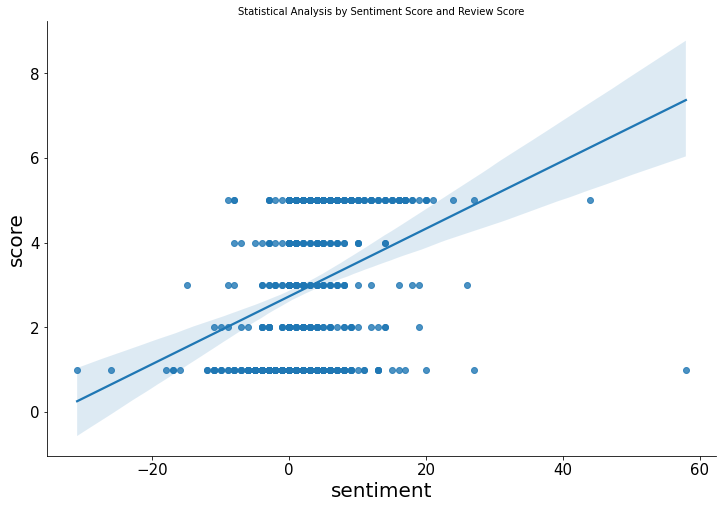

In [17]:
fig,ax = plt.subplots()
fig.set_size_inches(12,8)
plt.title('Statistical Analysis by Sentiment Score and Review Score',fontsize=10)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(rotation=0,fontsize=15)
plt.xlabel('Sentiment',fontsize=20)
plt.ylabel('Score',fontsize=20);
sns.regplot(x='sentiment',y='score',data=data)
sns.despine()